# K-Nearest Neighbors Classifier - the Random Dataset

### Introducing the database

The database for this example is randomly generated. Generating datasets is an important skill to have. This is the best way to explore the algorithms themelves without having to worry about encoding, standardizing, dealing with outliers and all sorts of preprocessing that comes with a real-world dataset. Another advantage of randomly generated datasets is that you have full control over the data. You are free to choose the number of features, the number of classes, the way the points are distributed, everything really! 

I wish you to have lots of fun with the exercise and keep experimenting!

### Importing the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import  make_blobs

### Generating the database

In [22]:
inputs  , target = make_blobs(n_samples=1000 , random_state=365 , centers=[(-3,3),(0,0),(2,2)])

In [24]:
inputs

array([[ 1.63046017,  2.09402946],
       [-2.81125197,  3.85224116],
       [ 0.50105079,  1.58253051],
       ...,
       [-0.58897444,  0.31771066],
       [-2.3285928 ,  4.95748895],
       [-0.40093516, -0.18595288]])

In [35]:
df=pd.DataFrame(data=inputs,columns=['feature1','feature2'])
df['target']=target

In [37]:
df

,feature1,feature2,target
0,1.630460,2.094029,2
1,-2.811252,3.852241,0
2,0.501051,1.582531,2
3,-3.624112,3.325318,0
4,-3.278106,2.359416,0
...,...,...,...
995,-4.412271,2.420197,0
996,0.398022,-0.847863,1
997,-0.588974,0.317711,1
998,-2.328593,4.957489,0


### Plotting the database

<Axes: xlabel='feature1', ylabel='feature2'>

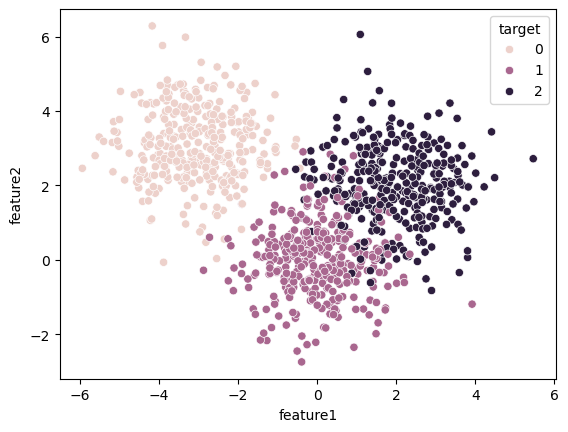

In [42]:
sns.scatterplot(x='feature1',y='feature2',data=df , hue='target', markers = [',', '^', 'P'],)

### Visualizing the distribution of the points

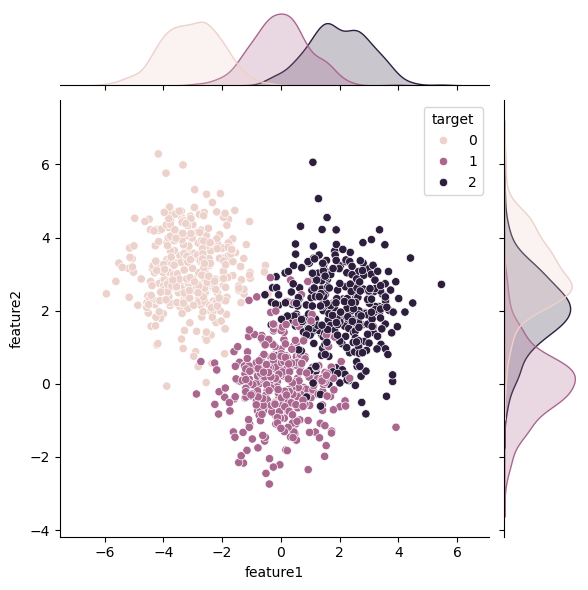

In [48]:
sns.jointplot(x="feature1", y="feature2" ,
                data=df,
                hue="target"
             )

### Creating a train-test-split

In [50]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(inputs , target , test_size=0.2)

### Creating the model

In [65]:
# we have like 2 option (what ik ) unforme and distance for the weights atribute 
# if we let it but default it gonna be unifomre means in case owr input is betwen two 
# target gonna take the smaller index even though that it may be largest from it than the seconde 
# but option distance handel this problime by take in the nearest by distance 

In [91]:
from sklearn.neighbors import KNeighborsClassifier 
clf_30=KNeighborsClassifier(n_neighbors=30 , weights="uniform") 
clf_30.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [93]:
from sklearn.neighbors import KNeighborsClassifier 
clf=KNeighborsClassifier(n_neighbors=1 , weights="uniform") 
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Predicting a sample

In [63]:
y_pred = clf.predict(x_test)  

In [ ]:
feature1=

### Visualizing the neighbors

### Getting the parameters of the model

In [58]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

### Drawing the decision regions

In [71]:
 from mlxtend.plotting import plot_decision_regions

import time

import numpy as np

In [85]:
feature_1 = -0.18
feature_2 = 3.2

<Axes: >

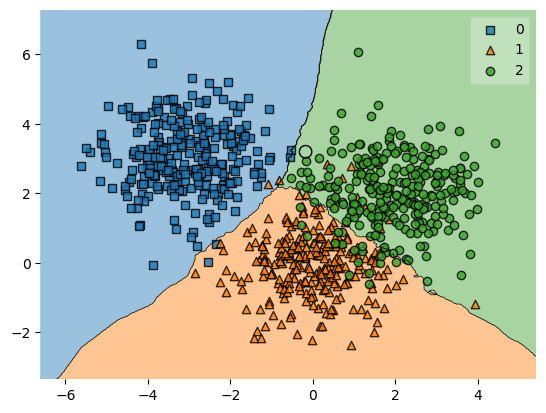

In [95]:
plot_decision_regions(X=x_train , y=y_train ,X_highlight = np.array([[feature_1, feature_2]]), clf=clf_30)

<Axes: >

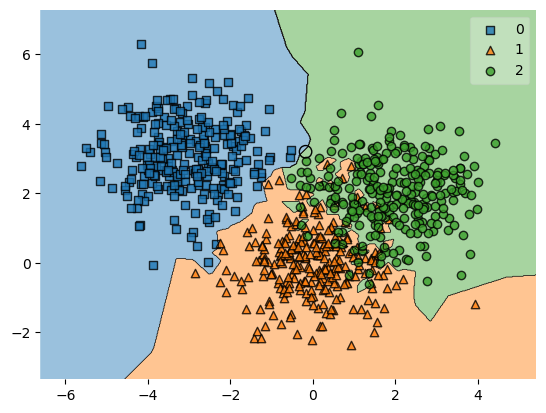

In [87]:
plot_decision_regions(X=x_train , y=y_train ,X_highlight = np.array([[feature_1, feature_2]]), clf=clf)

### Getting the error rates of a set of models

In [97]:
# to the best K value

In [117]:
from sklearn.metrics import accuracy_score
error_uniform = []
error_distance=[]
ranges = range(1, 51)
for i in range(1,51):
    clf=KNeighborsClassifier(n_neighbors=i , weights="uniform" )
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    error_uniform.append(1-accuracy_score(y_test,pred))
    clf=KNeighborsClassifier(n_neighbors=i , weights="distance" )
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    error_distance.append(1-accuracy_score(y_test,pred))

### Plotting the error rates as a function of the number of neighbors

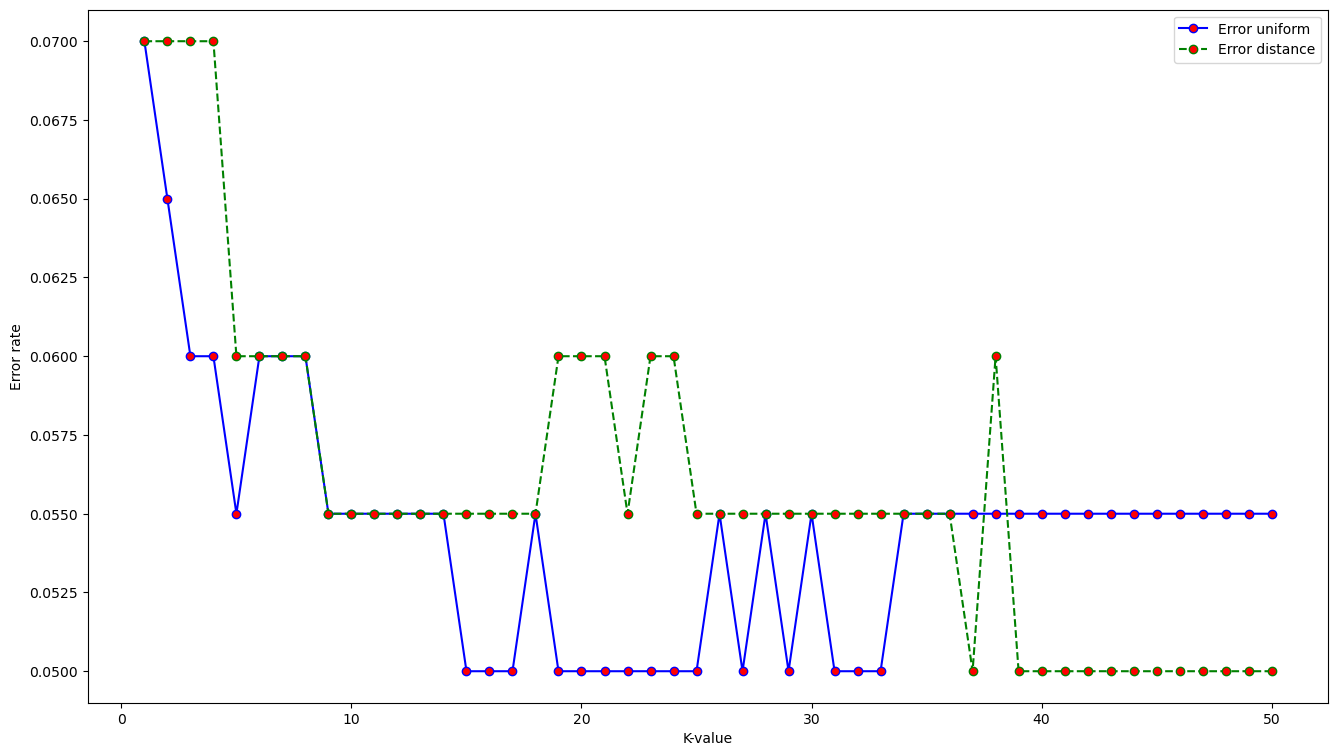

In [130]:
plt.figure(figsize = (16, 9))

plt.plot(k_range, error_uniform, c = 'blue', linestyle = 'solid', 
         marker = 'o', markerfacecolor = 'red',  label = 'Error uniform');
plt.plot(k_range, error_distance, c = 'green', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'red', label = 'Error distance');

plt.legend()

plt.xlabel('K-value')
plt.ylabel('Error rate');

### Choosing a set of parameters to test

In [165]:
from sklearn.model_selection import GridSearchCV 
param={
    "n_neighbors":range(1,51),
    "weights":
    ['uniform', 'distance']
}

### Create an instance of the GridSearchCV class

In [168]:

grid_search =GridSearchCV(estimator=KNeighborsClassifier(), 
                           param_grid = param, 
                           scoring = 'accuracy')

In [170]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [174]:
grid_search.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': range(1, 51),
  'weights': ['uniform', 'distance']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}

In [176]:
grid_search.best_params_

{'n_neighbors': 11, 'weights': 'uniform'}

In [ ]:
# the best is 10 neighbors

In [178]:
grid_search.best_score_

0.9512500000000002

### Make predictions on the test dataset

In [180]:
from sklearn.metrics import ConfusionMatrixDisplay  ,classification_report


In [182]:
clf = KNeighborsClassifier(n_neighbors=11, weights="uniform")
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

TypeError: ConfusionMatrixDisplay.__init__() missing 1 required positional argument: 'confusion_matrix'

### Construct the confusion matrix

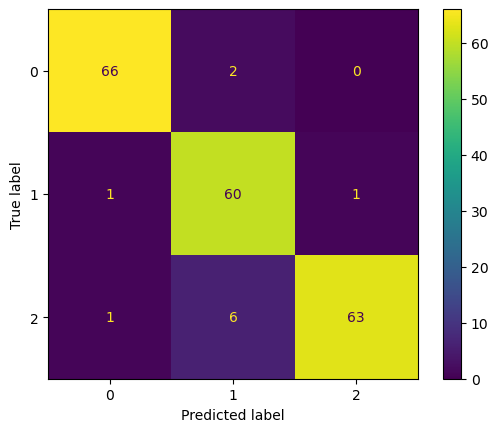

In [188]:
ConfusionMatrixDisplay.from_predictions(y_pred,y_test)

### Print out the classification report

In [193]:
print(classification_report(y_pred,y_test,labels=["0","1","2"]))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        68
           1       0.88      0.97      0.92        62
           2       0.98      0.90      0.94        70

   micro avg       0.94      0.94      0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200

